In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data=pd.read_csv('diabetes.csv')

In [17]:
data.shape


(100000, 9)

In [18]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [19]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [20]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['gender']= label_encoder.fit_transform(data['gender'],) 
  
data['gender'].unique() 

array([0, 1, 2])

In [21]:
# Encode labels in column 'species'. 
data['smoking_history']= label_encoder.fit_transform(data['smoking_history'],) 
  
data['smoking_history'].unique() 

array([4, 0, 1, 3, 2, 5])

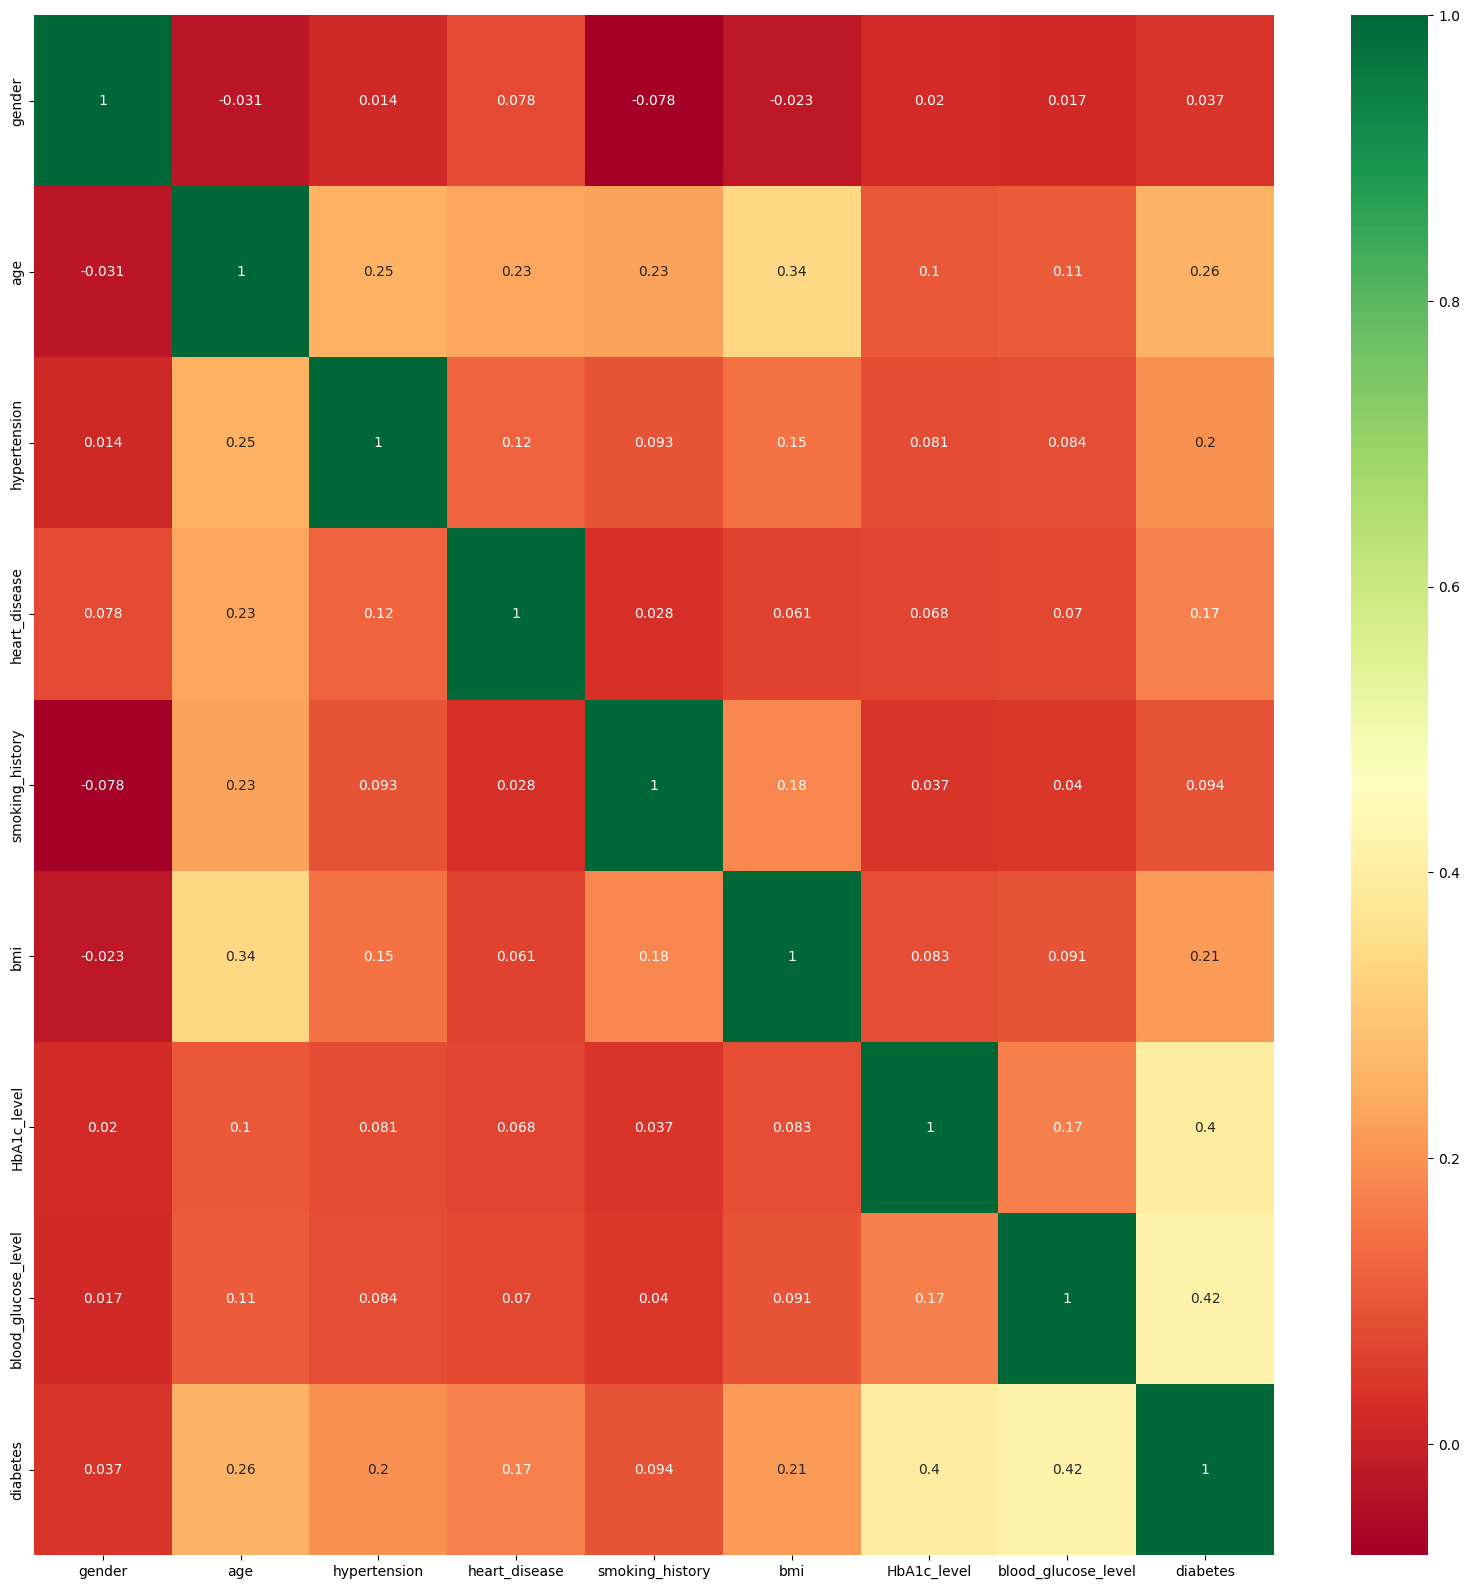

In [22]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
data.corr()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


In [24]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [25]:
(diabetes_true_count,diabetes_false_count)

(8500, 91500)

In [26]:
from sklearn.utils import resample
# separate minority and majority classes
not_diabetic= data[data.diabetes==0]
diabetic = data[data.diabetes==1]

# upsample minority
diabetic_upsampled = resample(diabetic ,
                          replace=True, # sample with replacement
                          n_samples=len(not_diabetic), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled_data = pd.concat([not_diabetic, diabetic_upsampled])

# check new class counts
upsampled_data.diabetes.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64

In [27]:
not_diabetic.count()

gender                 91500
age                    91500
hypertension           91500
heart_disease          91500
smoking_history        91500
bmi                    91500
HbA1c_level            91500
blood_glucose_level    91500
diabetes               91500
dtype: int64

In [28]:
upsampled_data.shape

(183000, 9)

In [29]:
upsampled_data.count()

gender                 183000
age                    183000
hypertension           183000
heart_disease          183000
smoking_history        183000
bmi                    183000
HbA1c_level            183000
blood_glucose_level    183000
diabetes               183000
dtype: int64

In [30]:

from sklearn.model_selection import train_test_split
feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']
predicted_class = ['diabetes']  

In [31]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['gender'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['hypertension'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['heart_disease'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['smoking_history'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['HbA1c_level'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['blood_glucose_level'] == 0])))

total number of rows : 100000
number of rows missing glucose_conc: 58552
number of rows missing glucose_conc: 0
number of rows missing diastolic_bp: 92515
number of rows missing insulin: 96058
number of rows missing bmi: 0
number of rows missing diab_pred: 35816
number of rows missing age: 0
number of rows missing skin: 0


In [32]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [33]:
X = upsampled_data[feature_columns].values
y = upsampled_data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## X and Y

In [34]:
X.shape

(183000, 8)

In [35]:
y.shape

(183000, 1)

### Training dataset


In [36]:
X_train.shape



(146400, 8)

In [37]:
y_train.shape

(146400, 1)

### Testing dataset

In [38]:
X_test.shape

(36600, 8)

In [39]:
y_test.shape

(36600, 1)

In [40]:
from sklearn.linear_model import LogisticRegression


#instantiate the model
logreg = LogisticRegression()


# fit the model
logreg.fit(X_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred_train=logreg.predict(X_train)

In [42]:
y_pred_train

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
y_pred_test=logreg.predict(X_test)

In [44]:
y_pred_test

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [45]:

# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([1.37017069e-01, 8.85171914e-01, 9.71848944e-01, ...,
       5.73581960e-02, 9.25885506e-04, 2.61295367e-01])

In [46]:

# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.86298293, 0.11482809, 0.02815106, ..., 0.9426418 , 0.99907411,
       0.73870463])

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8713


In [75]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=5, 
                               random_state=48)

random_forest_model.fit(X_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=48)

In [76]:
y_pred_train = random_forest_model.predict(X_train)
y_pred_train




array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [77]:


from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_train, y_pred_train)))

Accuracy = 0.901


In [78]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
# View confusion matrix for test data and predictions
confusion_matrix(y_train, y_pred_train)

array([[67605,  5669],
       [ 8806, 64320]], dtype=int64)

In [79]:

from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     73274
           1       0.92      0.88      0.90     73126

    accuracy                           0.90    146400
   macro avg       0.90      0.90      0.90    146400
weighted avg       0.90      0.90      0.90    146400



### test

In [80]:
y_pred_test= random_forest_model.predict(X_test)

from sklearn import metrics

# View accuracy score
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred_test)))

Accuracy = 0.902


In [54]:

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[16259,  1967],
       [ 1460, 16914]], dtype=int64)

In [55]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     18226
           1       0.90      0.92      0.91     18374

    accuracy                           0.91     36600
   macro avg       0.91      0.91      0.91     36600
weighted avg       0.91      0.91      0.91     36600



In [56]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [57]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [59]:
classifier=xgboost.XGBClassifier()

In [86]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=10,cv=7,verbose=3)

In [87]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [88]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 7 folds for each of 10 candidates, totalling 70 fits

 Time taken: 0 hours 0 minutes and 56.67 seconds.


In [63]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [354]:
classifier1=xgboost.XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              subsample=0.5,
              colsample_bytree=0.5, 
              gamma=0.5, learning_rate=0.010, max_depth=15, 
              min_child_weight=0.5, n_estimators=5,random_state=50)

In [355]:
classifier1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=50, ...)

In [356]:
ypred_train_xg=classifier1.predict(X_train)

In [357]:
ypred_train_xg

array([1, 1, 0, ..., 1, 1, 0])

In [358]:
accuracyxg1 = accuracy_score(y_train,ypred_train_xg)
print("Accuracy: %.2f%%" % (accuracyxg1 * 100.0))

Accuracy: 90.88%


### Test

In [359]:
ypred_test_xg=classifier1.predict(X_test)

In [360]:
ypred_test_xg

array([0, 1, 0, ..., 1, 1, 0])

In [361]:
accuracyxg2 = accuracy_score(y_test,ypred_test_xg)
print("Accuracy: %.2f%%" % (accuracyxg2 * 100.0))

Accuracy: 90.47%


In [258]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [73]:
score

array([0.93504098, 0.94139344, 0.94023224, 0.9375    , 0.93968579,
       0.9398224 , 0.94132514, 0.9409153 , 0.94474044, 0.93565574])

In [74]:
score.mean()

0.9396311475409836